In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def db2(level=0):
    """Daubechies' wavelet
    
    Calculate Daubechies' wavelet.

    Args:
        level (int) : Number of calculations.
    
    Returns:
        phi_list(list) : List of phi(scaling function).
        psi_list(list) : List of psi(wavelet function).
        t_list(list)   : List of t.
    """
    # Pn, Qn
    pn_list = [(1+np.sqrt(3))/4, (3+np.sqrt(3))/4, (3-np.sqrt(3))/4, (1-np.sqrt(3))/4]
    qn_list = [pow(-1,n) * pn_list[4-n-1] for n in range(len(pn_list))]

    # Initialize t_list, phi_list and psi_list
    t_list = [0.0,1.0,2.0,3.0]

    phi_0, phi_3 = 0, 0
    phi_1 = (1+np.sqrt(3))/2
    phi_2 = (1-np.sqrt(3))/2
    phi_list = [phi_0, phi_1, phi_2, phi_3]

    # Initialize psi_list
    psi_list = []
    for i, t in enumerate(t_list):
        index_list = [2*t, 2*t-1, 2*t-2, 2*t-3]
        tmp_psi = 0
        for j, idx in enumerate(index_list):
            if 0<=idx<=3:
                tmp_idx = t_list.index(idx)
                tmp_psi += qn_list[j]*phi_list[tmp_idx]
            else:
                tmp_psi += 0
        psi_list.append(tmp_psi)
    
    for _ in range(level):
        # Calculate tmp_t_list
        tmp_t_list = []
        for i in range(len(t_list)-1):
            tmp_t_list.append(round((t_list[i] + t_list[i+1]) / 2, int(len(str(t_list[1]).split(".")[-1])+1)))
        
        # Calculate tmp_phi_list
        tmp_phi_list = []
        for i, t in enumerate(tmp_t_list):
            index_list = [2*t, 2*t-1, 2*t-2, 2*t-3]
            index_list = [round(idx, int(len(str(tmp_t_list[0]).split(".")[-1])-1)) for idx in index_list]
            tmp_phi = 0
            for j, idx in enumerate(index_list):
                if 0<=idx<=3:
                    tmp_idx = t_list.index(idx)
                    tmp_phi += pn_list[j]*phi_list[tmp_idx]
                else:
                    tmp_phi += 0
            tmp_phi_list.append(tmp_phi)
        
        # Calculate tmp_psi_list
        tmp_psi_list = []
        for i, t in enumerate(tmp_t_list):
            index_list = [2*t, 2*t-1, 2*t-2, 2*t-3]
            index_list = [round(idx, int(len(str(tmp_t_list[0]).split(".")[-1])-1)) for idx in index_list]
            tmp_psi = 0
            for j, idx in enumerate(index_list):
                if 0<=idx<=3:
                    tmp_idx = t_list.index(idx)
                    tmp_psi += qn_list[j] * phi_list[tmp_idx]
                else:
                    tmp_psi += 0
            tmp_psi_list.append(tmp_psi)
        
        # Combine tmp_list and list alternately.
        new_phi_list = [phi_list[0]]
        for tmp, phi in zip(tmp_phi_list, phi_list[1:]):
            new_phi_list.append(tmp)
            new_phi_list.append(phi)
        
        new_psi_list = [psi_list[0]]
        for tmp, psi in zip(tmp_psi_list, psi_list[1:]):
            new_psi_list.append(tmp)
            new_psi_list.append(psi)

        new_t_list = [t_list[0]]
        for tmp, t in zip(tmp_t_list, t_list[1:]):
            new_t_list.append(tmp)
            new_t_list.append(t)
        
        # Update phi_list, psi_list and t_list.
        phi_list = new_phi_list
        psi_list = new_psi_list
        t_list = new_t_list

    return phi_list, psi_list, t_list

In [8]:
def plot_phi_and_psi(phi_list, psi_list, t_list):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(t_list, phi_list)
    plt.title(f"phi")
    plt.subplot(1,2,2)
    plt.plot(t_list, psi_list)
    plt.title(f"psi")
    plt.show()

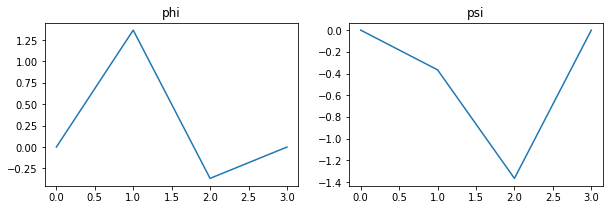

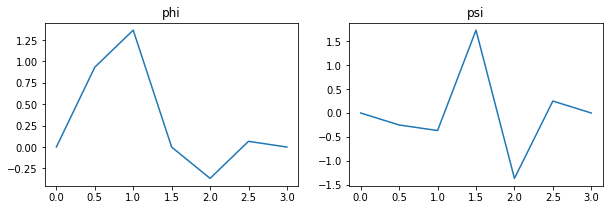

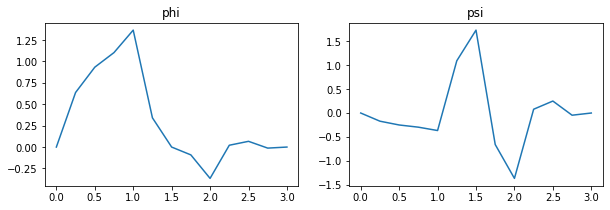

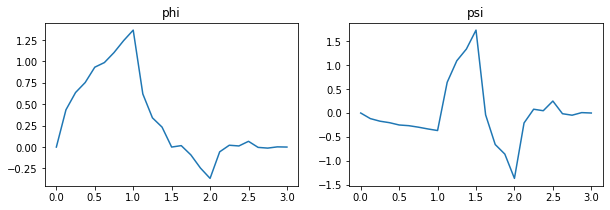

In [12]:
level = 0
phi_list, psi_list, t_list = db2(level=level)
plot_phi_and_psi(phi_list, psi_list, t_list)

level = 1
phi_list, psi_list, t_list = db2(level=level)
plot_phi_and_psi(phi_list, psi_list, t_list)

level = 2
phi_list, psi_list, t_list = db2(level=level)
plot_phi_and_psi(phi_list, psi_list, t_list)

level = 3
phi_list, psi_list, t_list = db2(level=level)
plot_phi_and_psi(phi_list, psi_list, t_list)